In [5]:
import pandas as pd

In [13]:
tmp = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C", attrs={"class": "wikitable collapsible collapsed"})
table = tmp[3]
print(table.head(5))

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [99]:
print("Кількість рядків та стовпців у датафреймі:", table.shape)

Кількість рядків та стовпців у датафреймі: (28, 9)


In [14]:
table = table.replace({"—": "NaN"})
print(table)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [15]:
print(table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [16]:
table = table.astype({'1990':'float64', '2000': 'float64', '2012':'float64', '2014': 'float64', '2019':'float64'})
print(table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [17]:
print(table.isnull().sum())

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


In [18]:

table = table.iloc[:-1]
print(table)

               Регіон   1950   1960   1970   1990   2000   2012   2014   2019
0                Крим  230.0  206.0  160.0  130.0   73.0  126.0    NaN    NaN
1           Вінницька  224.0  192.0  142.0  124.0   84.0  112.0  109.0   76.0
2           Волинська  247.0  250.0  179.0  153.0  112.0  148.0  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0  123.0   71.0  112.0  111.0   71.0
4            Донецька  271.0  214.0  140.0  109.0   61.0   98.0   82.0    NaN
5         Житомирська  261.0  223.0  159.0  129.0   89.0  122.0  120.0   79.0
6        Закарпатська  314.0  273.0  207.0  168.0  115.0  151.0  146.0  104.0
7          Запорізька  219.0  197.0  150.0  124.0   71.0  106.0  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0  155.0  103.0  124.0  122.0   88.0
9            Київська  204.0  189.0  156.0  123.0   73.0  122.0  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0  126.0   79.0  110.0  108.0   68.0
11          Луганська  262.0  235.0  144.0  116.0   62.0   96.0 

In [19]:
for t in table:
    if table[t].dtypes == 'float64':
        table[t].fillna(table[t].mean().round(1), inplace=True)
print(table)

               Регіон   1950   1960   1970   1990   2000   2012   2014   2019
0                Крим  230.0  206.0  160.0  130.0   73.0  126.0  111.4   80.2
1           Вінницька  224.0  192.0  142.0  124.0   84.0  112.0  109.0   76.0
2           Волинська  247.0  250.0  179.0  153.0  112.0  148.0  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0  123.0   71.0  112.0  111.0   71.0
4            Донецька  271.0  214.0  140.0  109.0   61.0   98.0   82.0   80.2
5         Житомирська  261.0  223.0  159.0  129.0   89.0  122.0  120.0   79.0
6        Закарпатська  314.0  273.0  207.0  168.0  115.0  151.0  146.0  104.0
7          Запорізька  219.0  197.0  150.0  124.0   71.0  106.0  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0  155.0  103.0  124.0  122.0   88.0
9            Київська  204.0  189.0  156.0  123.0   73.0  122.0  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0  126.0   79.0  110.0  108.0   68.0
11          Луганська  262.0  235.0  144.0  116.0   62.0   96.0 

In [20]:
br = table['2019'].mean().round(1)
print('Середні значення ', br)
print(table[table['2019'].ge(br)]['Регіон'])

Середні значення  80.2
0                  Крим
2             Волинська
4              Донецька
6          Закарпатська
8     Івано-Франківська
11            Луганська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
26          Севастополь
Name: Регіон, dtype: object


In [21]:
max = table['2014'].max().round(1)
print('Максимальне значення ', max)
print(table[table['2014'].eq(max)]['Регіон'])

Максимальне значення  148.0
16    Рівненська
Name: Регіон, dtype: object


In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

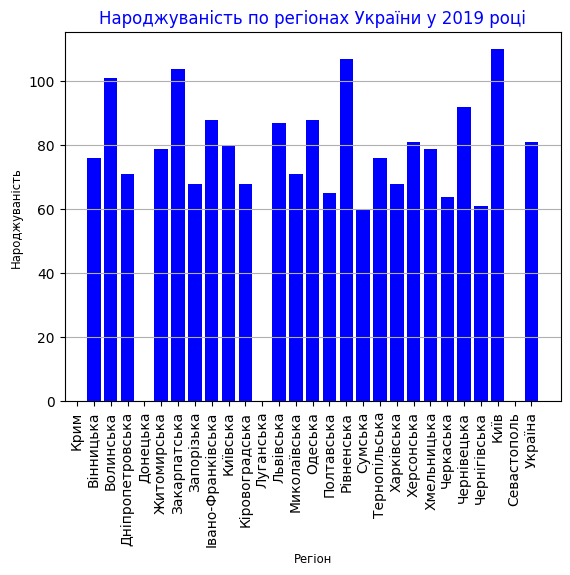

In [120]:
data = table[['Регіон', '2019']]
plt.bar(data['Регіон'], data['2019'], color='blue')
plt.xlabel('Регіон', fontsize='small')
plt.xticks(rotation=90)
plt.ylabel('Народжуваність', fontsize='small')
plt.title('Народжуваність по регіонах України у 2019 році', color="blue")
plt.grid(axis='y')
plt.show()

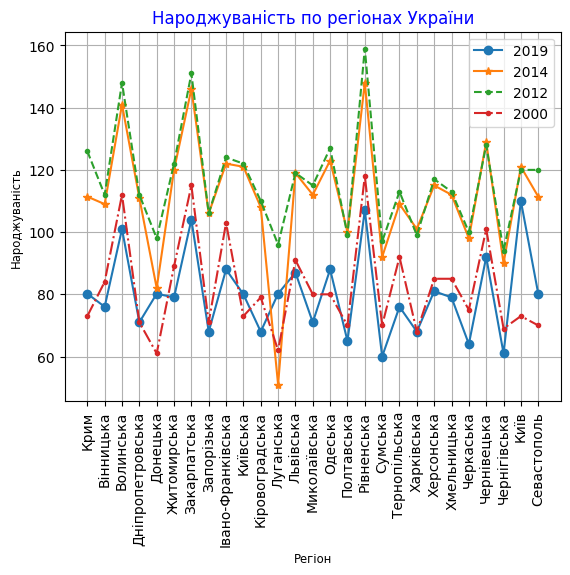

In [23]:

fig, axs = plt.subplots()
axs.plot(table['Регіон'], table['2019'], marker='o', label='2019')
axs.plot(table['Регіон'], table['2014'], marker='*', label='2014')
plt.plot(table['Регіон'], table['2012'], marker='.', label='2012', linestyle='--')
plt.plot(table['Регіон'], table['2000'], marker='.', label='2000', linestyle='-.')
plt.xlabel('Регіон', fontsize='small')
plt.ylabel('Народжуваність', fontsize='small')
plt.title('Народжуваність по регіонах України', color="blue")
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

Text(0.5, 1.0, 'Коефіцієнт народжуваності в 2019 по обл')

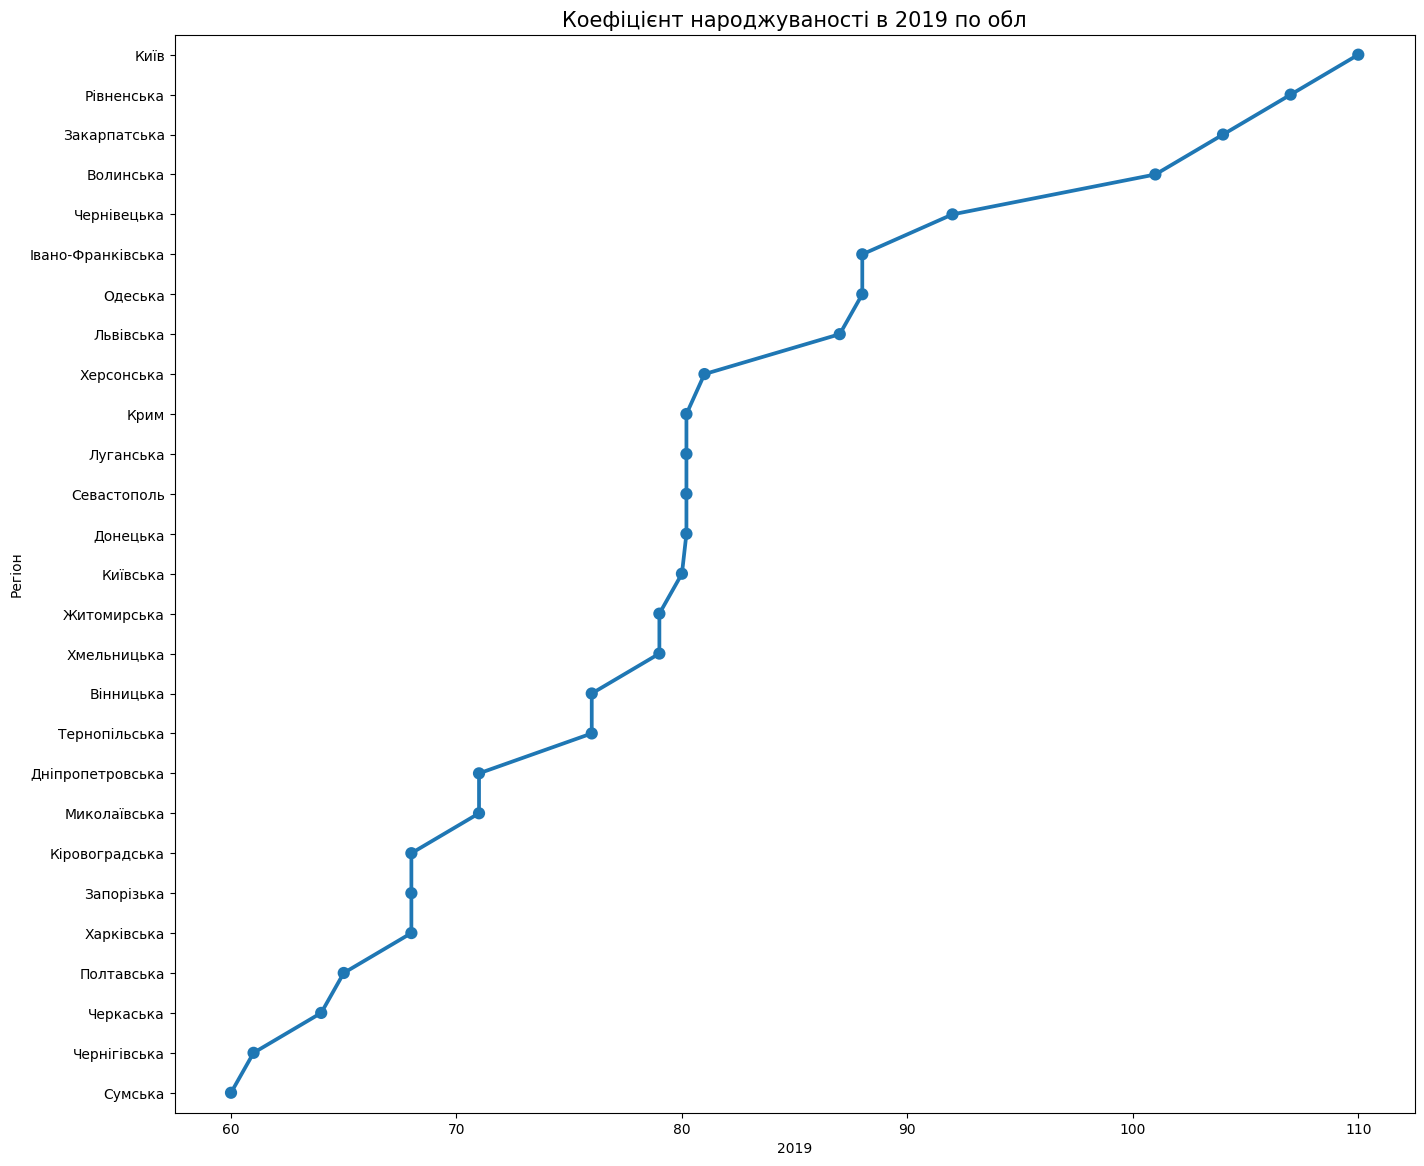

In [25]:
data = table.sort_values(['2019'], ascending=False)
fig, ax = plt.subplots(figsize=(16, 14))
sns.pointplot(x="2019", y="Регіон", data=data)
plt.title('Коефіцієнт народжуваності в 2019 по обл', fontsize=15)